# Parallel performance of a simple Python code
Here is a summary of the results from running the `mpi.py´ program.

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12,6]

In [2]:
# Dave
nprocDW = [64, 64, 320]
tsecDW = [2.2847, 1.5821, 1.0517]

In [3]:
# Leevi
nprocLT = [2, 8, 16, 64, 256]
tsecLT = [19.96, 6.23, 3.52, 2.26, 1.15]

In [4]:
# Letizia
nprocLC = [2, 8, 16, 32, 64, 256]
tsecLC = [22.8416, 6.2493, 3.3238, 4.0696, 2.3058, 1.1402]

In [5]:
# Tommi
nprocTV = [ 1, 2, 4, 16, 32, 64, 256 ]
tsecTV = [ 43.4103989601, 23.3102600574, 11.0595788956, 3.5252571106, 4.08421611786, 2.28794884682, 1.16591596603 ]

In [6]:
# Tuija
nprocTL = [2, 8, 16, 32, 128] 
tsecTL = [19.8880, 6.5444, 3.4134, 4.2096, 1.3018]

In [7]:
# Yijun
nprocYW = [16,32,64,128,256]
tsecYW = [3.3989,4.2119,1.5718,1.3543,1.1443]

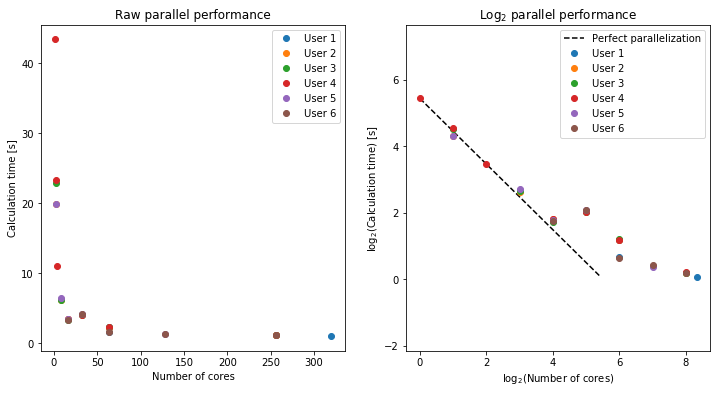

In [8]:
# Convert to NumPy arrays
nprocDW = np.array(nprocDW)
tsecDW = np.array(tsecDW)
nprocLT = np.array(nprocLT)
tsecLT = np.array(tsecLT)
nprocLC = np.array(nprocLC)
tsecLC = np.array(tsecLC)
nprocTV = np.array(nprocTV)
tsecTV = np.array(tsecTV)
nprocTL = np.array(nprocTL)
tsecTL = np.array(tsecTL)
nprocYW = np.array(nprocYW)
tsecYW = np.array(tsecYW)

# Plot data
f, (ax1, ax2) = plt.subplots(1, 2)
ax1.plot(nprocDW, tsecDW, 'o', label='User 1')
ax1.plot(nprocLT, tsecLT, 'o', label='User 2')
ax1.plot(nprocLC, tsecLC, 'o', label='User 3')
ax1.plot(nprocTV, tsecTV, 'o', label='User 4')
ax1.plot(nprocTL, tsecTL, 'o', label='User 5')
ax1.plot(nprocYW, tsecYW, 'o', label='User 6')
ax1.set_xlabel('Number of cores')
ax1.set_ylabel('Calculation time [s]')
ax1.set_title('Raw parallel performance')
ax1.legend()

# Find bounds for reference parallel performance line
minx = min(nprocDW.min(), nprocLT.min(), nprocLC.min(), nprocTV.min(), nprocTL.min(), nprocYW.min())
miny = min(tsecDW.min(), tsecLT.min(), tsecLC.min(), tsecTV.min(), tsecTL.min(), tsecYW.min())
maxy = max(tsecDW.max(), tsecLT.max(), tsecLC.max(), tsecTV.max(), tsecTL.max(), tsecYW.max())
maxx = minx + (maxy - miny)
ax2.plot([np.log2(minx), np.log2(maxx)], [np.log2(maxy), np.log2(miny)], 'k--', label='Perfect parallelization')

ax2.plot(np.log2(nprocDW), np.log2(tsecDW), 'o', label='User 1')
ax2.plot(np.log2(nprocLT), np.log2(tsecLT), 'o', label='User 2')
ax2.plot(np.log2(nprocLC), np.log2(tsecLC), 'o', label='User 3')
ax2.plot(np.log2(nprocTV), np.log2(tsecTV), 'o', label='User 4')
ax2.plot(np.log2(nprocTL), np.log2(tsecTL), 'o', label='User 5')
ax2.plot(np.log2(nprocYW), np.log2(tsecYW), 'o', label='User 6')

ax2.axis('equal')
ax2.set_xlabel('log$_{2}$(Number of cores)')
ax2.set_ylabel('log$_{2}$(Calculation time) [s]')
ax2.set_title('Log$_{2}$ parallel performance')
ax2.legend()